In [1]:
#installar packages
import re
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import numpy as np
import catboost
from catboost import CatBoostClassifier
import phik
from phik import resources, report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from catboost import CatBoostClassifier
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#https://www.datacamp.com/community/tutorials/random-forests-classifier-python?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=278443377086&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1001765&gclid=Cj0KCQiAu62QBhC7ARIsALXijXTgLcXo7tj8eRaMiTw76g-_f7Kq5ZFURGBx3i3VOL3Vnuy8RR6dduUaAlMwEALw_wcB
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
#clf=RandomForestClassifier(n_estimators=100)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/
import tensorflow as tf
#Encoding Categorical Variable Gender
from sklearn.preprocessing import LabelEncoder
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_excel(r'/media/lbcb/Roberton/elkin /articulo_ tuberculosis /new_Calculs/imagenens/dfdumies_2.xlsx', sheet_name='Sheet3')
df = pd.read_excel(r'/media/lbcb/Roberton/elkin /articulo_ tuberculosis /new_Calculs/imagenens/dfdumies_2.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5966 entries, 0 to 5965
Columns: 182 entries, SEX_F to COMORBIDITY_smoking
dtypes: int64(182)
memory usage: 8.3 MB


In [3]:
df.columns.values

array(['SEX_F', 'SEX_M', 'ETHNIC_AFROCOLOMBIANO', 'ETHNIC_DESPLAZADO',
       'ETHNIC_INDIGENA', 'ETHNIC_MESTIZO', 'ETHNIC_OTROS',
       'NEIGHBORHOOD_AREA CENTRO', 'NEIGHBORHOOD_AREA SUR',
       'NEIGHBORHOOD_METROPOLITANA',
       'NEIGHBORHOOD_Norte Centro Historico', 'NEIGHBORHOOD_RIOMAR',
       'NEIGHBORHOOD_SOLEDAD', 'NEIGHBORHOOD_SUIRORIENTE',
       'NEIGHBORHOOD_SUROCCIDENTE', 'NEIGHBORHOOD_SURORIENTE',
       'REGIME_Contributivo', 'REGIME_ESPECIAL', 'REGIME_NO AFILIADO',
       'REGIME_S-SUBSIDIADO', 'EAPB_ ASMET SALUD', 'EAPB_ COMPARTA',
       'EAPB_ COOSALUD E.S.S.', 'EAPB_ EMDISALUD ESS',
       'EAPB_A.R.S. CONVIDA / EPS022 / SBS', 'EAPB_ALIANSALUD EPS',
       'EAPB_AMBUQ', 'EAPB_AMBUQ ESS', 'EAPB_ANASWAYUU',
       'EAPB_ANASWAYUU EPSI / EPSI04 / SBS', 'EAPB_ARMADA NACIONAL',
       'EAPB_ASMET', 'EAPB_ASMET SALUD',
       'EAPB_ASOCIACIÓN INDÍGENA DEL CAUCA - AIC / EPSI03 / SBS',
       'EAPB_ASOCIACIÓN INDÍGENA DEL CESAR Y LA GUAJIRA - DUSAKAWI / EPSI01 / SBS',
 

In [4]:
df2 = pd.read_excel(r'/media/lbcb/Roberton/elkin /articulo_ tuberculosis /new_Calculs/imagenens/dfdumies.xlsx')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5966 entries, 0 to 5965
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ABANDONMENT   5966 non-null   int64
 1   CURED         5966 non-null   int64
 2   DECEASED      5966 non-null   int64
 3   FAILURE       5966 non-null   int64
 4   In treatment  5966 non-null   int64
 5   TRANSFERRED   5966 non-null   int64
dtypes: int64(6)
memory usage: 279.8 KB


### How save file with SVG

In [ ]:
#https://www.southampton.ac.uk/~feeg1001/notebooks/Matplotlib.html

In [5]:
x = df
y = df2['DECEASED']

In [ ]:
#https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/2-Feature%20Selection-%20Correlation.ipynb

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1740
           1       0.49      0.07      0.13       229

    accuracy                           0.88      1969
   macro avg       0.69      0.53      0.53      1969
weighted avg       0.84      0.88      0.84      1969

[[1722   18]
 [ 212   17]]
0.8831894362620619


In [7]:
import matplotlib
matplotlib.use('svg')
import matplotlib.pylab as plt
import numpy
from IPython.display import Image, SVG
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
               confusion_matrix(y_test, predictions).flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(y_test, predictions).flatten()/np.sum(confusion_matrix(y_test, predictions))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix(y_test, predictions), annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with LR\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig(r"/media/lbcb/Roberton/elkin /articulo_ tuberculosis /new_Calculs/confusion_matrix_LR.svg")
plt.show()


<ipython-input-7-a655b32a99f2>:31: UserWarning: Matplotlib is currently using svg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [10]:
logmodel.intercept_

array([-3.71148685])

In [11]:
log_odds = logmodel.coef_[0]

In [21]:
pd.DataFrame(log_odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
EAPB_IPS UNIVERSITARIA,1.227252
COMORBIDITY_Cáncer,1.116386
HIV_POSITIVO,1.105564
COMORBIDITY_Renal disease,1.031161
COMORBIDITY_Liver disease,0.846288
...,...
EAPB_SALUD TOTAL EPS,-0.783015
EAPB_MUTUALSER,-0.814505
EAPB_HUMANAVIVIR,-0.902316
EAPB_SOLSALUD,-1.038689


In [9]:
odds = np.exp(logmodel.coef_[0])
odds_2=pd.DataFrame(odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)
odds_2.to_excel(r'/media/lbcb/Roberton/elkin /articulo_ tuberculosis /new_Calculs/imagenens/odds_3.xlsx')

In [10]:
odds_2

,coef
EAPB_IPS UNIVERSITARIA,3.411843
COMORBIDITY_Cáncer,3.053797
HIV_POSITIVO,3.020927
COMORBIDITY_Renal disease,2.804320
COMORBIDITY_Liver disease,2.330978
...,...
EAPB_SALUD TOTAL EPS,0.457026
EAPB_MUTUALSER,0.442858
EAPB_HUMANAVIVIR,0.405629
EAPB_SOLSALUD,0.353918


No handles with labels found to put in legend.


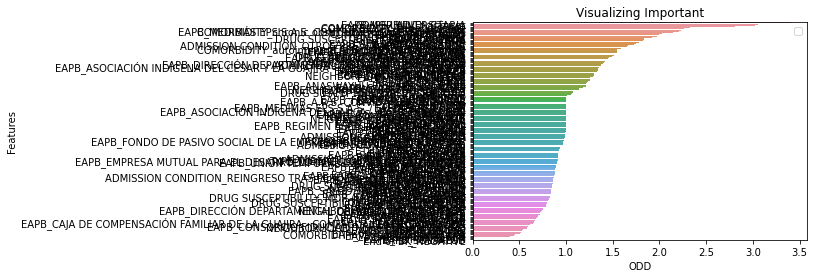

In [16]:
import matplotlib
matplotlib.use('svg')
import numpy
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=odds_2['coef'], y=odds_2.index)
# Add labels to your graph
plt.xlabel('ODD')
plt.ylabel('Features')
plt.title("Visualizing Important")
plt.legend()
plt.savefig(r"/media/lbcb/Roberton/elkin /articulo_ tuberculosis /new_Calculs/imagenens/ODD_LR.svg")
plt.show()


In [19]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

In [20]:
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [21]:
predi_random = clf.predict(x_test)
print(classification_report(y_test, predi_random))
print(confusion_matrix(y_test, predi_random))
print(accuracy_score(y_test, predi_random))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1740
           1       0.29      0.10      0.15       229

    accuracy                           0.87      1969
   macro avg       0.59      0.53      0.54      1969
weighted avg       0.82      0.87      0.84      1969

[[1685   55]
 [ 206   23]]
0.867445403758253


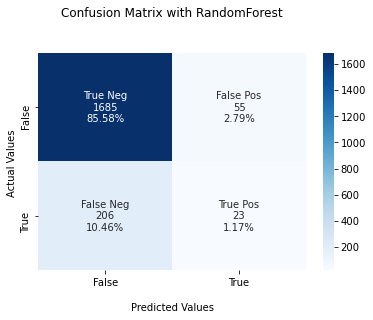

In [22]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
               confusion_matrix(y_test, predi_random).flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(y_test, predi_random).flatten()/np.sum(confusion_matrix(y_test, predi_random))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix(y_test, predi_random), annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with RandomForest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig(r"/media/lbcb/Roberton/elkin /articulo_ tuberculosis /new_Calculs/confusion_matrix_RandomForest.svg")
plt.show()


In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, predi_random))

Accuracy: 0.867445403758253


In [35]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_ ,index=x_train.columns).sort_values(ascending=False)

feature_imp

End of BK_NEGATIVE                                         0.064669
HIV_POSITIVO                                               0.057575
DRUG SUSCEPTIBILITY_ISONIAZIDA                             0.043420
NEIGHBORHOOD_SURORIENTE                                    0.039298
HIV_NEGATIVO                                               0.039049
                                                             ...   
EAPB_SUSALUD                                               0.000000
EAPB_ASOCIACIÓN INDÍGENA DEL CAUCA - AIC / EPSI03 / SBS    0.000000
EAPB_comparta                                              0.000000
EAPB_COLMENA E.P.S. S.A                                    0.000000
EAPB_PARTICULAR                                            0.000000
Length: 182, dtype: float64

In [36]:
feature_imp.to_excel(r'/media/lbcb/Roberton/elkin /articulo_ tuberculosis /new_Calculs/imagenens/RandomForest_feature_3.xlsx')

No handles with labels found to put in legend.


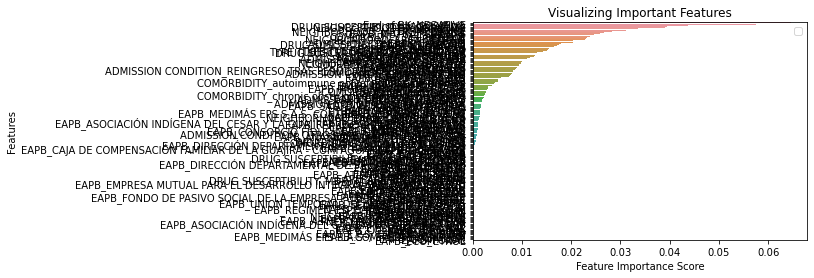

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [39]:
from catboost import CatBoostClassifier
#entrenar mauina predectiva 
Maquina_predictiva= CatBoostClassifier(n_estimators=1000, max_depth=16, random_state=7)                
Maquina_predictiva.fit(x_train, y_train)

Learning rate set to 0.018615
0:	learn: 0.6787800	total: 78.6ms	remaining: 1m 18s
1:	learn: 0.6559445	total: 83.8ms	remaining: 41.8s
2:	learn: 0.6407674	total: 157ms	remaining: 52.1s
3:	learn: 0.6220281	total: 305ms	remaining: 1m 16s
4:	learn: 0.6017874	total: 309ms	remaining: 1m 1s
5:	learn: 0.5909327	total: 311ms	remaining: 51.5s
6:	learn: 0.5785914	total: 464ms	remaining: 1m 5s
7:	learn: 0.5591981	total: 475ms	remaining: 58.9s
8:	learn: 0.5437436	total: 635ms	remaining: 1m 9s
9:	learn: 0.5334484	total: 641ms	remaining: 1m 3s
10:	learn: 0.5250952	total: 643ms	remaining: 57.8s
11:	learn: 0.5106872	total: 646ms	remaining: 53.2s
12:	learn: 0.4974081	total: 797ms	remaining: 1m
13:	learn: 0.4905682	total: 799ms	remaining: 56.3s
14:	learn: 0.4785383	total: 810ms	remaining: 53.2s
15:	learn: 0.4723872	total: 812ms	remaining: 49.9s
16:	learn: 0.4662537	total: 957ms	remaining: 55.4s
17:	learn: 0.4605689	total: 959ms	remaining: 52.3s
18:	learn: 0.4545198	total: 970ms	remaining: 50.1s
19:	learn:

159:	learn: 0.2285036	total: 17.2s	remaining: 1m 30s
160:	learn: 0.2281390	total: 17.3s	remaining: 1m 30s
161:	learn: 0.2276962	total: 17.5s	remaining: 1m 30s
162:	learn: 0.2270325	total: 17.6s	remaining: 1m 30s
163:	learn: 0.2267259	total: 17.8s	remaining: 1m 30s
164:	learn: 0.2263870	total: 18s	remaining: 1m 31s
165:	learn: 0.2263530	total: 18s	remaining: 1m 30s
166:	learn: 0.2258796	total: 18.2s	remaining: 1m 30s
167:	learn: 0.2258236	total: 18.2s	remaining: 1m 30s
168:	learn: 0.2257191	total: 18.2s	remaining: 1m 29s
169:	learn: 0.2254698	total: 18.4s	remaining: 1m 29s
170:	learn: 0.2253813	total: 18.4s	remaining: 1m 29s
171:	learn: 0.2251050	total: 18.5s	remaining: 1m 29s
172:	learn: 0.2240760	total: 18.7s	remaining: 1m 29s
173:	learn: 0.2240276	total: 18.7s	remaining: 1m 28s
174:	learn: 0.2240084	total: 18.7s	remaining: 1m 28s
175:	learn: 0.2239452	total: 18.9s	remaining: 1m 28s
176:	learn: 0.2234184	total: 19s	remaining: 1m 28s
177:	learn: 0.2232896	total: 19.2s	remaining: 1m 28s

316:	learn: 0.1921770	total: 35s	remaining: 1m 15s
317:	learn: 0.1919713	total: 35.2s	remaining: 1m 15s
318:	learn: 0.1918594	total: 35.3s	remaining: 1m 15s
319:	learn: 0.1916157	total: 35.5s	remaining: 1m 15s
320:	learn: 0.1915837	total: 35.5s	remaining: 1m 15s
321:	learn: 0.1913027	total: 35.6s	remaining: 1m 15s
322:	learn: 0.1912049	total: 35.8s	remaining: 1m 15s
323:	learn: 0.1909021	total: 36s	remaining: 1m 15s
324:	learn: 0.1905915	total: 36.1s	remaining: 1m 15s
325:	learn: 0.1902741	total: 36.3s	remaining: 1m 14s
326:	learn: 0.1902232	total: 36.3s	remaining: 1m 14s
327:	learn: 0.1900640	total: 36.3s	remaining: 1m 14s
328:	learn: 0.1899377	total: 36.5s	remaining: 1m 14s
329:	learn: 0.1898666	total: 36.5s	remaining: 1m 14s
330:	learn: 0.1898058	total: 36.5s	remaining: 1m 13s
331:	learn: 0.1893396	total: 36.7s	remaining: 1m 13s
332:	learn: 0.1890323	total: 36.8s	remaining: 1m 13s
333:	learn: 0.1888704	total: 36.9s	remaining: 1m 13s
334:	learn: 0.1883724	total: 37s	remaining: 1m 13s

475:	learn: 0.1658519	total: 53.1s	remaining: 58.5s
476:	learn: 0.1658036	total: 53.3s	remaining: 58.4s
477:	learn: 0.1657055	total: 53.4s	remaining: 58.4s
478:	learn: 0.1656903	total: 53.5s	remaining: 58.1s
479:	learn: 0.1652516	total: 53.6s	remaining: 58.1s
480:	learn: 0.1652359	total: 53.6s	remaining: 57.8s
481:	learn: 0.1652100	total: 53.6s	remaining: 57.6s
482:	learn: 0.1648362	total: 53.8s	remaining: 57.5s
483:	learn: 0.1647859	total: 53.9s	remaining: 57.5s
484:	learn: 0.1645917	total: 54.1s	remaining: 57.4s
485:	learn: 0.1645236	total: 54.2s	remaining: 57.3s
486:	learn: 0.1642276	total: 54.4s	remaining: 57.3s
487:	learn: 0.1640652	total: 54.6s	remaining: 57.3s
488:	learn: 0.1636865	total: 54.8s	remaining: 57.2s
489:	learn: 0.1635811	total: 54.9s	remaining: 57.2s
490:	learn: 0.1635445	total: 55.1s	remaining: 57.1s
491:	learn: 0.1635052	total: 55.1s	remaining: 56.9s
492:	learn: 0.1634727	total: 55.3s	remaining: 56.8s
493:	learn: 0.1634500	total: 55.3s	remaining: 56.6s
494:	learn: 

633:	learn: 0.1373250	total: 1m 16s	remaining: 44.3s
634:	learn: 0.1371542	total: 1m 16s	remaining: 44.2s
635:	learn: 0.1368881	total: 1m 17s	remaining: 44.1s
636:	learn: 0.1366827	total: 1m 17s	remaining: 44s
637:	learn: 0.1366665	total: 1m 17s	remaining: 43.9s
638:	learn: 0.1363987	total: 1m 17s	remaining: 43.8s
639:	learn: 0.1363348	total: 1m 17s	remaining: 43.7s
640:	learn: 0.1360951	total: 1m 17s	remaining: 43.6s
641:	learn: 0.1358820	total: 1m 18s	remaining: 43.5s
642:	learn: 0.1358029	total: 1m 18s	remaining: 43.4s
643:	learn: 0.1355822	total: 1m 18s	remaining: 43.3s
644:	learn: 0.1354846	total: 1m 18s	remaining: 43.2s
645:	learn: 0.1354405	total: 1m 18s	remaining: 43.1s
646:	learn: 0.1351806	total: 1m 18s	remaining: 43s
647:	learn: 0.1351588	total: 1m 18s	remaining: 42.9s
648:	learn: 0.1349635	total: 1m 19s	remaining: 42.8s
649:	learn: 0.1348653	total: 1m 19s	remaining: 42.7s
650:	learn: 0.1346434	total: 1m 19s	remaining: 42.6s
651:	learn: 0.1343431	total: 1m 19s	remaining: 42.

789:	learn: 0.1196698	total: 1m 41s	remaining: 26.9s
790:	learn: 0.1195860	total: 1m 41s	remaining: 26.8s
791:	learn: 0.1195422	total: 1m 41s	remaining: 26.6s
792:	learn: 0.1194771	total: 1m 41s	remaining: 26.5s
793:	learn: 0.1194365	total: 1m 41s	remaining: 26.4s
794:	learn: 0.1192497	total: 1m 41s	remaining: 26.3s
795:	learn: 0.1192361	total: 1m 42s	remaining: 26.2s
796:	learn: 0.1190737	total: 1m 42s	remaining: 26s
797:	learn: 0.1189473	total: 1m 42s	remaining: 25.9s
798:	learn: 0.1188379	total: 1m 42s	remaining: 25.8s
799:	learn: 0.1187907	total: 1m 42s	remaining: 25.7s
800:	learn: 0.1187237	total: 1m 42s	remaining: 25.5s
801:	learn: 0.1186502	total: 1m 42s	remaining: 25.4s
802:	learn: 0.1185398	total: 1m 43s	remaining: 25.3s
803:	learn: 0.1184464	total: 1m 43s	remaining: 25.2s
804:	learn: 0.1183710	total: 1m 43s	remaining: 25.1s
805:	learn: 0.1183483	total: 1m 43s	remaining: 24.9s
806:	learn: 0.1181805	total: 1m 43s	remaining: 24.8s
807:	learn: 0.1181248	total: 1m 43s	remaining: 2

947:	learn: 0.1079062	total: 2m 5s	remaining: 6.9s
948:	learn: 0.1078656	total: 2m 5s	remaining: 6.77s
949:	learn: 0.1077198	total: 2m 6s	remaining: 6.63s
950:	learn: 0.1076868	total: 2m 6s	remaining: 6.5s
951:	learn: 0.1075254	total: 2m 6s	remaining: 6.37s
952:	learn: 0.1075091	total: 2m 6s	remaining: 6.24s
953:	learn: 0.1074542	total: 2m 6s	remaining: 6.11s
954:	learn: 0.1073813	total: 2m 6s	remaining: 5.98s
955:	learn: 0.1073621	total: 2m 7s	remaining: 5.85s
956:	learn: 0.1072583	total: 2m 7s	remaining: 5.71s
957:	learn: 0.1072247	total: 2m 7s	remaining: 5.58s
958:	learn: 0.1071963	total: 2m 7s	remaining: 5.45s
959:	learn: 0.1071197	total: 2m 7s	remaining: 5.32s
960:	learn: 0.1070726	total: 2m 7s	remaining: 5.19s
961:	learn: 0.1069904	total: 2m 7s	remaining: 5.05s
962:	learn: 0.1069024	total: 2m 8s	remaining: 4.92s
963:	learn: 0.1067949	total: 2m 8s	remaining: 4.79s
964:	learn: 0.1066954	total: 2m 8s	remaining: 4.66s
965:	learn: 0.1066501	total: 2m 8s	remaining: 4.53s
966:	learn: 0.

In [40]:
#predicoes=Maquina_predictiva.predict_prova(x_test)
#score do modelo test
result= Maquina_predictiva.score(x_test, y_test)
print("acuraci de os datos de teste:%.3f%%" %(result*100.0))

acuraci de os datos de teste:86.592%


In [41]:
predi_catboost = Maquina_predictiva.predict(x_test)
print(classification_report(y_test, predi_catboost))
print(confusion_matrix(y_test, predi_catboost))
print(accuracy_score(y_test, predi_catboost))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1740
           1       0.30      0.11      0.16       229

    accuracy                           0.87      1969
   macro avg       0.60      0.54      0.55      1969
weighted avg       0.82      0.87      0.84      1969

[[1679   61]
 [ 203   26]]
0.8659217877094972


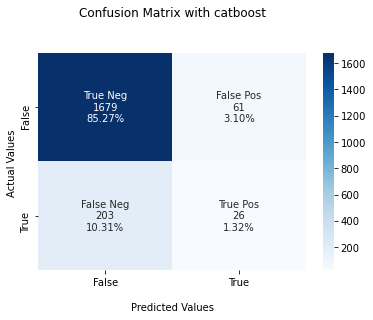

In [42]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
               confusion_matrix(y_test, predi_catboost).flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(y_test, predi_catboost).flatten()/np.sum(confusion_matrix(y_test, predi_catboost))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix(y_test, predi_catboost), annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with catboost\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig(r"/media/lbcb/Roberton/elkin /articulo_ tuberculosis /new_Calculs/confusion_matrix_catboost.svg")
plt.show()

In [79]:
#determinação das variables máis importantes
Maquina_predictiva.feature_importances_

array([2.50287881e+00, 2.33854182e+00, 5.11783160e-02, 1.30971409e-04,
       4.24616424e-02, 1.00929751e-02, 1.17832162e+00, 1.60420928e+00,
       0.00000000e+00, 2.52207654e+00, 1.03822877e-01, 6.88836731e-01,
       1.07461968e-03, 0.00000000e+00, 4.56857792e-01, 2.68234043e+00,
       1.58806536e+00, 4.23006287e-01, 6.45937619e-01, 1.46412918e+00,
       1.63283493e-04, 3.45526611e-05, 6.48654310e-02, 5.32483037e-02,
       0.00000000e+00, 1.21401529e-02, 1.80346371e-01, 3.01825141e-01,
       9.92238450e-06, 6.55623358e-03, 1.84327034e-05, 4.75697321e-03,
       8.85573887e-04, 0.00000000e+00, 1.61071125e-02, 3.20183365e-05,
       1.27481223e-03, 1.11735335e-04, 2.52907319e-02, 1.35581583e-02,
       2.83290140e-06, 8.71431027e-02, 6.89063125e-03, 4.38590811e-05,
       5.68818716e-01, 0.00000000e+00, 1.33779377e-04, 4.77489560e-01,
       0.00000000e+00, 0.00000000e+00, 1.36238323e-03, 3.55432190e-03,
       4.83445449e-03, 0.00000000e+00, 4.51951663e-04, 6.31224232e-04,
      

In [43]:
feature_CatBoost2 = pd.Series(Maquina_predictiva.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_CatBoost2.to_excel(r'/media/lbcb/Roberton/elkin /articulo_ tuberculosis /new_Calculs/imagenens/catboost.xlsx')

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [45]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [46]:
predi_knn = knn.predict(x_test)
print(classification_report(y_test, predi_knn ))
print(confusion_matrix(y_test, predi_knn ))
print(accuracy_score(y_test, predi_knn ))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1740
           1       0.29      0.04      0.08       229

    accuracy                           0.88      1969
   macro avg       0.59      0.51      0.50      1969
weighted avg       0.82      0.88      0.83      1969

[[1715   25]
 [ 219   10]]
0.8760792280345353


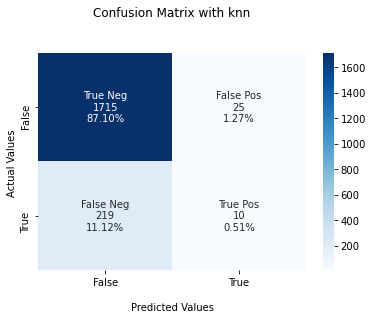

In [47]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
               confusion_matrix(y_test, predi_knn ).flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                    confusion_matrix(y_test, predi_knn ).flatten()/np.sum( confusion_matrix(y_test, predi_knn ))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix(y_test, predi_knn ), annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with knn\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.savefig(r"/media/lbcb/Roberton/elkin /articulo_ tuberculosis /new_Calculs/confusion_matrix_knn.svg")
## Display the visualization of the Confusion Matrix.
plt.show()

In [49]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap


In [51]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [ ]:
#from sklearn.inspection import permutation_importance


# perform permutation importance
results = permutation_importance(knn,x_test, y_test, scoring='accuracy')
# get importance
importance = results.importances_mean
#importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

Minimum error:- 0.11630269172168614 at K = 25


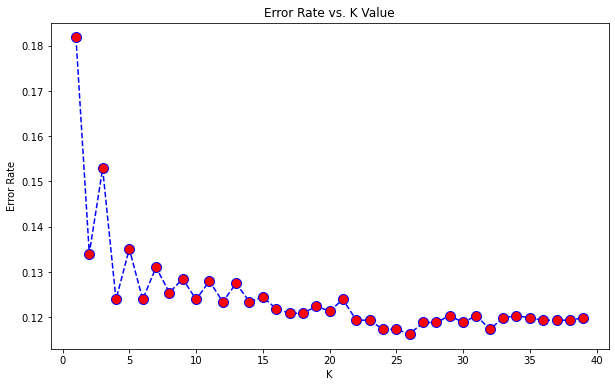

In [37]:
Ks = 40
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
#https://github.com/Amey23/Machine-Learning/blob/master/K-Nearest%20Neighbor/knn.ipynb

In [39]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.8836973082783138 at K = 25


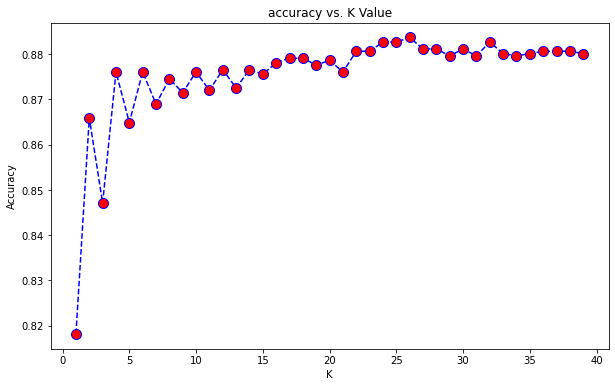

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
#https://github.com/Amey23/Machine-Learning/tree/master/K-Nearest%20Neighbor

In [99]:
from sklearn import metrics
#We are going to run it for k = 1 to 15 and will be recording testing accuracy, plotting it, showing confusion matrix and classification report:
Range_k = range(1,40)
scores = {}
scores_list = []
for k in Range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(x_train, y_train)
   y_pred = classifier.predict(x_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[1731    9]
 [ 227    2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94      1740
           1       0.18      0.01      0.02       229

    accuracy                           0.88      1969
   macro avg       0.53      0.50      0.48      1969
weighted avg       0.80      0.88      0.83      1969



Text(0, 0.5, 'Accuracy')

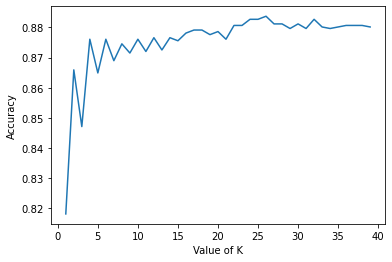

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")


In [108]:
from sklearn.tree import DecisionTreeClassifier
clfTreeClassifier = DecisionTreeClassifier()

In [109]:
clfTreeClassifier = clfTreeClassifier.fit(x_train,y_train)

In [110]:
predi_clfTreeClassifier  = clfTreeClassifier .predict(x_test)
print(classification_report(y_test, predi_clfTreeClassifier ))
print(confusion_matrix(y_test, predi_clfTreeClassifier ))
print(accuracy_score(y_test, predi_clfTreeClassifier ))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1740
           1       0.22      0.18      0.20       229

    accuracy                           0.83      1969
   macro avg       0.56      0.55      0.55      1969
weighted avg       0.82      0.83      0.82      1969

[[1593  147]
 [ 188   41]]
0.829862874555612


In [118]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clfTreeClassifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = clfTreeClassifier.feature_importances_,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')


In [152]:
#graph.write_png('diabetes.png')
#Image(graph.create_png())

In [ ]:

import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



# divide the dataset into class and target variable


# Preprocess the dataset and divide into train and test


# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)

# plot the scatterplot
plt.scatter(
	X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
alpha=0.7,edgecolors='b'
)

# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix



In [77]:
from sklearn import svm

In [78]:
clf_svm = svm.SVC(decision_function_shape='ovo')

In [79]:
clf_svm = clf_svm.fit(x_train,y_train)

In [80]:
predi_clf_svm  = clf_svm.predict(x_test)
print(classification_report(y_test, predi_clf_svm ))
print(confusion_matrix(y_test, predi_clf_svm ))
print(accuracy_score(y_test, predi_clf_svm ))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1740
           1       0.00      0.00      0.00       229

    accuracy                           0.88      1969
   macro avg       0.44      0.50      0.47      1969
weighted avg       0.78      0.88      0.83      1969

[[1740    0]
 [ 229    0]]
0.8836973082783138


/home/lbcb/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lbcb/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lbcb/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
clf_GradientBoostingClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=7)

In [85]:
clf_GradientBoostingClassifier = clf_GradientBoostingClassifier.fit(x_train,y_train)

In [86]:
predi_clf_GradientBoostingClassifie  = clf_GradientBoostingClassifier.predict(x_test)
print(classification_report(y_test, predi_clf_GradientBoostingClassifie ))
print(confusion_matrix(y_test, predi_clf_GradientBoostingClassifie ))
print(accuracy_score(y_test, predi_clf_GradientBoostingClassifie ))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1740
           1       0.42      0.10      0.16       229

    accuracy                           0.88      1969
   macro avg       0.65      0.54      0.55      1969
weighted avg       0.84      0.88      0.84      1969

[[1709   31]
 [ 207   22]]
0.8791264601320468


In [87]:
feature_clf_GradientBoostingClassifier = pd.Series(clf_GradientBoostingClassifier.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_clf_GradientBoostingClassifier

HIV_POSITIVO                                                       0.418112
End of BK_NEGATIVE                                                 0.220551
COMORBIDITY_Malnutrition                                           0.032596
COMORBIDITY_Cáncer                                                 0.023433
EAPB_NUEVA EPS                                                     0.022466
                                                                     ...   
EAPB_FONDO DE PASIVO SOCIAL DE LA EMPRESA PUERTOS DE COLOMBIA .    0.000000
EAPB_FONCOLPUERTOS                                                 0.000000
EAPB_FIDUPREVISORA                                                 0.000000
EAPB_FEVISALUD                                                     0.000000
SEX_F                                                              0.000000
Length: 182, dtype: float64

In [68]:
from sklearn.neural_network import MLPClassifier

In [69]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=7)

In [70]:
clf_MLPClassifier = classifier.fit(x_train,y_train)

In [71]:
predi_clf_MLPClassifier = clf_MLPClassifier.predict(x_test)
print(classification_report(y_test, predi_clf_MLPClassifier))
print(confusion_matrix(y_test, predi_clf_MLPClassifier ))
print(accuracy_score(y_test, predi_clf_MLPClassifier))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1740
           1       0.24      0.19      0.21       229

    accuracy                           0.84      1969
   macro avg       0.57      0.56      0.56      1969
weighted avg       0.82      0.84      0.83      1969

[[1606  134]
 [ 186   43]]
0.8374809547993906


In [90]:
#https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
#https://insightlab.ufc.br/5-passos-para-criar-seu-1o-projeto-de-deep-learning-com-python-e-keras
#https://github.com/fchollet/deep-learning-with-python-notebooks
#https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection


In [91]:
from sklearn.naive_bayes import GaussianNB

In [96]:
gnb = GaussianNB()

In [93]:
clf_gnb  = gnb.fit(x_train,y_train)

In [94]:
predi_clf_gnb  = clf_gnb.predict(x_test)
print(classification_report(y_test, predi_clf_gnb  ))
print(confusion_matrix(y_test, predi_clf_gnb  ))
print(accuracy_score(y_test, predi_clf_gnb  ))

              precision    recall  f1-score   support

           0       0.99      0.35      0.51      1740
           1       0.16      0.96      0.28       229

    accuracy                           0.42      1969
   macro avg       0.57      0.65      0.40      1969
weighted avg       0.89      0.42      0.49      1969

[[ 605 1135]
 [   9  220]]
0.41899441340782123


In [7]:
from mlxtend.classifier import StackingCVClassifier 


In [99]:
#https://www.datacamp.com/community/tutorials/ensemble-learning-python
#https://colab.research.google.com/drive/1MEcl4W1Mr9_rRJEPcY2IHWppJq08bgc2?usp=sharing#scrollTo=EsN5ESLSljel
knn = KNeighborsClassifier(n_neighbors=4)
rf = RandomForestClassifier(n_estimators=1000)
gnb = GaussianNB()
lr = LogisticRegression()
lf_GradientBoostingClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=7)
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=7)
clf_svm = svm.SVC(decision_function_shape='ovo')
estimators = [knn,gnb,rf,lr,lf_GradientBoostingClassifier,classifier ]
stack = StackingCVClassifier(classifiers = estimators,
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = LogisticRegression())

In [100]:
stack.fit(x_train, y_train)
stack.score(x_test,y_test)

0.877602844083291

In [101]:
predi_clf_stack = stack.predict(x_test)
print(classification_report(y_test, predi_clf_stack   ))
print(confusion_matrix(y_test, predi_clf_stack   ))
print(accuracy_score(y_test, predi_clf_stack  ))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1740
           1       0.39      0.10      0.15       229

    accuracy                           0.88      1969
   macro avg       0.64      0.54      0.54      1969
weighted avg       0.83      0.88      0.84      1969

[[1706   34]
 [ 207   22]]
0.877602844083291


In [108]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense


In [110]:

# definir o modelo com keras

# inicializar o modelo sequencial

model = Sequential()

# inicializar a primeira camada, com 12 neurônios, 8 entradas utilizando a função ReLU

model.add(Dense(12, input_dim=8, activation='relu'))

# inicializar a segunda camada com 8 neurônios e a função ReLU

model.add(Dense(8, activation='relu'))

# inicializar a última camada (camada de saída) com um neurônio e a função Sigmoid

model.add(Dense(1, activation='sigmoid'))


In [111]:
# compile the keras model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [115]:
#model.fit(x_train, y_train, epochs=150, batch_size=10)
#https://insightlab.ufc.br/5-passos-para-criar-seu-1o-projeto-de-deep-learning-com-python-e-keras

/home/lbcb/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,
/home/lbcb/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


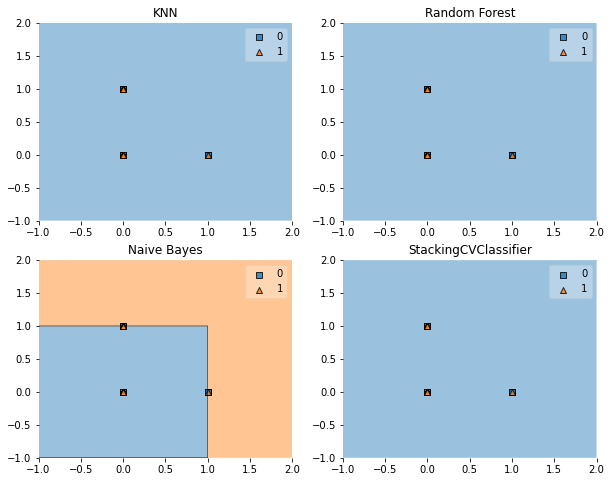

In [137]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([knn, rf, gnb, stack], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingCVClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(x_train[["COMORBIDITY_smoking","COMORBIDITY_VIH"]], y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x_train[["COMORBIDITY_smoking","COMORBIDITY_VIH"]].to_numpy(), y=y_train.to_numpy(), clf=clf)
    plt.title(lab)
plt.show()

In [139]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
import shap

In [140]:
model = models.Sequential(name="Perceptron", layers=[
    layers.Dense(             #a fully connected layer
          name="dense",
          input_dim=3,        #with 3 features as the input
          units=1,            #and 1 node because we want 1 output
          activation='linear' #f(x)=x
    )
])
model.summary()
#https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [141]:
# define the function
import tensorflow as tf
def binary_step_activation(x):
    ##return 1 if x>0 else 0 
    return K.switch(x>0, tf.math.divide(x,x), tf.math.multiply(x,0))

# build the model
model = models.Sequential(name="Perceptron", layers=[
      layers.Dense(             
          name="dense",
          input_dim=3,        
          units=1,            
          activation=binary_step_activation
      )
])

In [142]:
n_features = 10
model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)), 
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), 
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 6)                 66        
                                                                 
 drop1 (Dropout)             (None, 6)                 0         
                                                                 
 h2 (Dense)                  (None, 3)                 21        
                                                                 
 drop2 (Dropout)             (None, 3)                 0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [143]:
# Perceptron
inputs = layers.Input(name="input", shape=(3,))
outputs = layers.Dense(name="output", units=1, 
                       activation='linear')(inputs)
model = models.Model(inputs=inputs, outputs=outputs, 
                     name="Perceptron")

# DeepNN
### layer input
inputs = layers.Input(name="input", shape=(n_features,))
### hidden layer 1
h1 = layers.Dense(name="h1", units=int(round((n_features+1)/2)), activation='relu')(inputs)
h1 = layers.Dropout(name="drop1", rate=0.2)(h1)
### hidden layer 2
h2 = layers.Dense(name="h2", units=int(round((n_features+1)/4)), activation='relu')(h1)
h2 = layers.Dropout(name="drop2", rate=0.2)(h2)
### layer output
outputs = layers.Dense(name="output", units=1, activation='sigmoid')(h2)
model = models.Model(inputs=inputs, outputs=outputs, name="DeepNN")


In [145]:
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

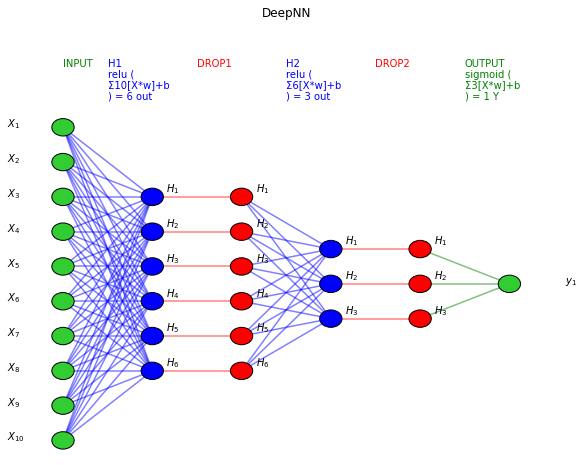

In [146]:
visualize_nn(model, description=True, figsize=(10,8))

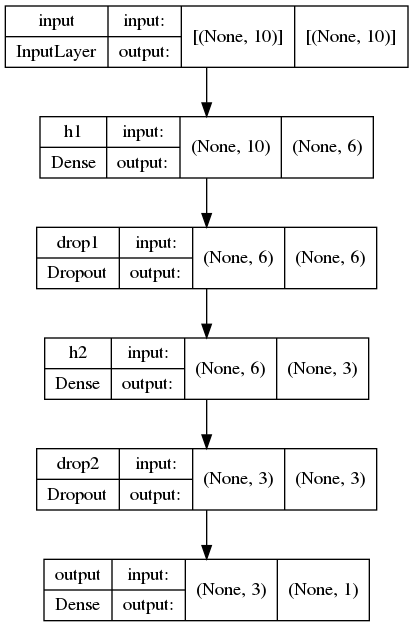

In [149]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [150]:
# define metrics
def Recall(x_train, y_train):
    true_positives = K.sum(K.round(K.clip(x_train * y_train, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(x_train, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(x_train, y_train):
    true_positives = K.sum(K.round(K.clip(x_train * y_train, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_train, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(x_train, y_train):
    precision = Precision(x_train, y_train)
    recall = Recall(x_train, y_train)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the neural network
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy',F1])

In [151]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense


In [152]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [153]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [157]:

# fit the keras model on the dataset
#model.fit(x_train, y_train)
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
#https://github.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/blob/master/machine_learning/example_regression.ipynb
#https://towardsdatascience.com/all-machine-learning-algorithms-you-should-know-in-2022-db5b4ccdf32f